## Data Visualization

Steps for visualizing data

In [1]:
import os
import boto3
import urllib3

# Disable SSL warnings
urllib3.disable_warnings()

# Retrieve credentials and endpoint from environment variables
key_id = os.getenv("AWS_ACCESS_KEY_ID")
secret_key = os.getenv("AWS_SECRET_ACCESS_KEY")
endpoint = os.getenv("AWS_S3_ENDPOINT")
bucket_name = os.getenv("AWS_S3_BUCKET")

In [2]:
# Initialize S3 client
s3 = boto3.client(
    "s3",
    aws_access_key_id=key_id,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint,
    verify=False
)

In [3]:
# retrieve the metadata of contents within the bucket
objects = s3.list_objects_v2(Bucket=bucket_name)

In [4]:
# output the name of each object within the bucket
for obj in objects["Contents"]:
    print(obj["Key"])

data/HC_DATA_description.txt
data/HC_DATA_map.png
data/HomeCredit_columns_description.csv
data/POS_CASH_balance.csv
data/application_test.csv
data/application_train.csv
data/bureau.csv
data/bureau_balance.csv
data/credit_card_balance.csv
data/imbalanced classification.txt
data/installments_payments.csv
data/previous_application.csv
input.txt
models/README.md
models/config.json
models/generation_config.json
models/pytorch_model-00001-of-00002.bin
models/pytorch_model-00002-of-00002.bin
models/pytorch_model.bin.index.json
models/special_tokens_map.json
models/test/xgb_classifier.onnx
models/tokenizer.model
models/tokenizer_config.json
models/xgb/1/xgb_classifier.onnx
pipelines/5c72035f-909e-44f5-8e0b-fd691225960b
test-pipeline-1-0814071046/enrich_data-9c5e5181-b7d8-405c-97ff-d3870493207b.tar.gz
test-pipeline-1-0814071046/enrich_data.html
test-pipeline-1-0814071046/enrich_data.ipynb
test-pipeline-1-0814071046/enrich_output.txt
test-pipeline-1-0814071046/ingest_data-a5fa0379-10b8-4182-85c8

In [5]:
# Ensure the local "data" directory exists
if not os.path.exists("data"):
    os.makedirs("data")   

# Download the file "data/application_train.csv" from the specified S3 bucket and save it locally as "data/application_train.csv"
s3.download_file(bucket_name, "data/application_train.csv", "data/application_train.csv")
s3.download_file(bucket_name, "data/application_test.csv", "data/application_test.csv")

In [6]:
import pandas as pd

# from zipfile import ZipFile

In [7]:
df_train = pd.read_csv('data/application_train.csv')
df_test = pd.read_csv('data/application_test.csv')

df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Filling missing values

In [9]:

# 1. Fill missing values in numerical columns using median based on groupings
# Fill AMT_INCOME_TOTAL based on OCCUPATION_TYPE
df_train['AMT_INCOME_TOTAL'] = df_train['AMT_INCOME_TOTAL'].fillna(df_train.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('median'))

# Fill AMT_ANNUITY based on NAME_INCOME_TYPE
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].fillna(df_train.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].transform('median'))

# Fill DAYS_EMPLOYED based on OCCUPATION_TYPE
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].fillna(df_train.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].transform('median'))

# Fill EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 based on NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE
df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(df_train.groupby('NAME_FAMILY_STATUS')['EXT_SOURCE_1'].transform('median'))
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(df_train.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_2'].transform('median'))
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(df_train.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_3'].transform('median'))

# Fill OWN_CAR_AGE based on NAME_HOUSING_TYPE
df_train['OWN_CAR_AGE'] = df_train['OWN_CAR_AGE'].fillna(df_train.groupby('NAME_HOUSING_TYPE')['OWN_CAR_AGE'].transform('median'))

# Fill CNT_FAM_MEMBERS based on NAME_FAMILY_STATUS
df_train['CNT_FAM_MEMBERS'] = df_train['CNT_FAM_MEMBERS'].fillna(df_train.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median'))

# Fill AMT_GOODS_PRICE based on AMT_CREDIT
df_train['AMT_GOODS_PRICE'] = df_train['AMT_GOODS_PRICE'].fillna(df_train.groupby('AMT_CREDIT')['AMT_GOODS_PRICE'].transform('median'))

# 2. Fill missing values in categorical columns using mode or group-based mode
# Fill categorical columns (strings) with the mode (most frequent value)
df_train['NAME_INCOME_TYPE'] = df_train['NAME_INCOME_TYPE'].fillna(df_train['NAME_INCOME_TYPE'].mode()[0])
df_train['NAME_EDUCATION_TYPE'] = df_train['NAME_EDUCATION_TYPE'].fillna(df_train['NAME_EDUCATION_TYPE'].mode()[0])
df_train['NAME_FAMILY_STATUS'] = df_train['NAME_FAMILY_STATUS'].fillna(df_train['NAME_FAMILY_STATUS'].mode()[0])
df_train['NAME_HOUSING_TYPE'] = df_train['NAME_HOUSING_TYPE'].fillna(df_train['NAME_HOUSING_TYPE'].mode()[0])

# For OCCUPATION_TYPE, fill based on the mode within each NAME_INCOME_TYPE group
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].fillna(df_train.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Optionally, fill other categorical columns based on related groupings
# Fill NAME_EDUCATION_TYPE based on NAME_INCOME_TYPE
df_train['NAME_EDUCATION_TYPE'] = df_train['NAME_EDUCATION_TYPE'].fillna(df_train.groupby('NAME_INCOME_TYPE')['NAME_EDUCATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Fill NAME_HOUSING_TYPE based on NAME_FAMILY_STATUS
df_train['NAME_HOUSING_TYPE'] = df_train['NAME_HOUSING_TYPE'].fillna(df_train.groupby('NAME_FAMILY_STATUS')['NAME_HOUSING_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Display the first few rows of the updated dataframe
print(df_train[['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']].head())

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE  
0  House / apartment        Laborers  
1  House / apartment      Core staff  
2  House / apartment        Laborers  
3  House / apartment        Laborers  
4  House / apartment      Core staff  


In [10]:

# 1. Fill missing values in numerical columns using median based on groupings
# Fill AMT_INCOME_TOTAL based on OCCUPATION_TYPE
df_test['AMT_INCOME_TOTAL'] = df_test['AMT_INCOME_TOTAL'].fillna(df_test.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('median'))

# Fill AMT_ANNUITY based on NAME_INCOME_TYPE
df_test['AMT_ANNUITY'] = df_test['AMT_ANNUITY'].fillna(df_test.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].transform('median'))

# Fill DAYS_EMPLOYED based on OCCUPATION_TYPE
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].fillna(df_test.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].transform('median'))

# Fill EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 based on NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE
df_test['EXT_SOURCE_1'] = df_test['EXT_SOURCE_1'].fillna(df_test.groupby('NAME_FAMILY_STATUS')['EXT_SOURCE_1'].transform('median'))
df_test['EXT_SOURCE_2'] = df_test['EXT_SOURCE_2'].fillna(df_test.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_2'].transform('median'))
df_test['EXT_SOURCE_3'] = df_test['EXT_SOURCE_3'].fillna(df_test.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_3'].transform('median'))

# Fill OWN_CAR_AGE based on NAME_HOUSING_TYPE
df_test['OWN_CAR_AGE'] = df_test['OWN_CAR_AGE'].fillna(df_test.groupby('NAME_HOUSING_TYPE')['OWN_CAR_AGE'].transform('median'))

# Fill CNT_FAM_MEMBERS based on NAME_FAMILY_STATUS
df_test['CNT_FAM_MEMBERS'] = df_test['CNT_FAM_MEMBERS'].fillna(df_test.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median'))

# Fill AMT_GOODS_PRICE based on AMT_CREDIT
df_test['AMT_GOODS_PRICE'] = df_test['AMT_GOODS_PRICE'].fillna(df_test.groupby('AMT_CREDIT')['AMT_GOODS_PRICE'].transform('median'))

# 2. Fill missing values in categorical columns using mode or group-based mode
# Fill categorical columns (strings) with the mode (most frequent value)
df_test['NAME_INCOME_TYPE'] = df_test['NAME_INCOME_TYPE'].fillna(df_test['NAME_INCOME_TYPE'].mode()[0])
df_test['NAME_EDUCATION_TYPE'] = df_test['NAME_EDUCATION_TYPE'].fillna(df_test['NAME_EDUCATION_TYPE'].mode()[0])
df_test['NAME_FAMILY_STATUS'] = df_test['NAME_FAMILY_STATUS'].fillna(df_test['NAME_FAMILY_STATUS'].mode()[0])
df_test['NAME_HOUSING_TYPE'] = df_test['NAME_HOUSING_TYPE'].fillna(df_test['NAME_HOUSING_TYPE'].mode()[0])

# For OCCUPATION_TYPE, fill based on the mode within each NAME_INCOME_TYPE group
df_test['OCCUPATION_TYPE'] = df_test['OCCUPATION_TYPE'].fillna(df_test.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Optionally, fill other categorical columns based on related groupings
# Fill NAME_EDUCATION_TYPE based on NAME_INCOME_TYPE
df_test['NAME_EDUCATION_TYPE'] = df_test['NAME_EDUCATION_TYPE'].fillna(df_test.groupby('NAME_INCOME_TYPE')['NAME_EDUCATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Fill NAME_HOUSING_TYPE based on NAME_FAMILY_STATUS
df_test['NAME_HOUSING_TYPE'] = df_test['NAME_HOUSING_TYPE'].fillna(df_test.groupby('NAME_FAMILY_STATUS')['NAME_HOUSING_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

# Display the first few rows of the updated dataframe
print(df_test[['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']].head())

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
2          Working               Higher education            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE     OCCUPATION_TYPE  
0  House / apartment            Laborers  
1  House / apartment  Low-skill Laborers  
2  House / apartment             Drivers  
3  House / apartment         Sales staff  
4  House / apartment            Laborers  


## Reasons for choosing columns

The selection of these specific columns over others is based on their direct relevance to the core aspects of financial behavior, risk assessment, and repayment capability. Another suggested method would be to run Principal Component Analysis (PCA) on the features, to help find the features that contain the most information, by reducing the dimensionality of the data (Cutting out useless features). In this sample, I chose to use my own understanding of the data for feature selection over PCA as the dataset's target variable is made for checking if the user made late payments, rather than whether or not the loan was given to them. We could (not recommended) assume that late payments could be counted as not giving a loan but it would reduce the accuracy of the model.

### 1. Direct Impact on Loan Repayment
- Financial Metrics: Columns like AMT_INCOME_TOTAL, AMT_CREDIT, and AMT_ANNUITY are crucial as they directly relate to the client’s financial health and obligations. They provide quantitative data that can be used to assess how much a client can borrow and how well they can repay.
- Essential for Predictive Models: Machine learning models often rely on numerical data that reflects clients' financial situations. These columns provide clear metrics for building models focused on predicting repayment behavior.

### 2. Behavioral and Demographic Insights
- Socioeconomic Factors: Columns like NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, and OCCUPATION_TYPE help capture qualitative insights about the client's background and behavior. These factors can significantly influence financial decision-making and repayment capabilities.
- Behavioral Trends: Understanding how different income types or education levels correlate with repayment behavior can enhance the model's ability to identify potential risks.

### 3. Stability and Risk Indicators
- Employment and Age: Columns such as DAYS_EMPLOYED and DAYS_BIRTH serve as proxies for stability. Clients who have been employed for longer periods or are at certain life stages may demonstrate more reliable financial behavior, making these columns vital for risk assessment.
- Housing and Family Dynamics: The NAME_HOUSING_TYPE and CNT_FAM_MEMBERS columns provide insights into the client's living situation and family obligations, which can significantly affect financial stability and repayment patterns.

### 4. External Validation
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: These external scores are essential for adding a layer of validation to the client's profile. They provide third-party assessments of creditworthiness, which are invaluable in making informed lending decisions.

### 5. Client Reachability
- Contact Flags: The presence of flags like FLAG_MOBIL, FLAG_EMAIL, and FLAG_WORK_PHONE is crucial for operational aspects of loan management. Being able to contact clients easily can directly affect the repayment process and risk management strategies.

### 6. Exclusion of Less Relevant Columns
- Less Impactful Variables: While there are many other columns in the dataset, not all are as impactful for predicting loan repayment. For instance, columns like APARTMENTS_AVG or ELEVATORS_AVG may provide contextual data about housing but do not directly influence a client’s repayment ability or behavior.
- Data Redundancy: Some features might be correlated with those chosen, potentially adding noise rather than value to the model. Selecting a focused set of variables reduces complexity and enhances interpretability.


In [11]:
#Filter for important columns
important_columns = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
    'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'FLAG_MOBIL', 'FLAG_EMAIL', 'FLAG_WORK_PHONE',
    'OCCUPATION_TYPE'
]

filtered_df = df_train[important_columns]

filtered_df.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  \
0  House / apartment       -9461           -637                    0.018801   
1  House / apartment      -16765          -1188                    0.003541   
2  House / apartment      -19046           -225                    0.010032   
3  House / apartment      -19005          -3039                    0.008019   
4  House / apartment      -19932          -3038                    0.028663   

   CNT_FAM_MEMBERS  FLAG_MOBIL  FLAG_EMAIL  FLAG_WORK_PHONE OCCUPATION_TYPE  
0              1.0           1           0                0        Laborers  
1              2.0           1           0                0      Core staff  
2              1.0           1           0                1        Laborers  
3              2.0           1           0                0        Laborers  
4              1.0           1           0                0      Core staff

In [12]:
# do the same for test
test_filtered = df_test[important_columns]
test_filtered.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          202500.0    663264.0      69777.0         630000.0   
3          315000.0   1575000.0      49018.5        1575000.0   
4          180000.0    625500.0      32067.0         625500.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
2          Working               Higher education            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  \
0  House / apartment      -19241          -2329                    0.018850   
1  House / apartment      -18064          -4469                    0.035792   
2  House / apartment      -20038          -4458                    0.019101   
3  House / apartment      -13976          -1866                    0.026392   
4  House / apartment      -13040          -2191                    0.010032   

   CNT_FAM_MEMBERS  FLAG_MOBIL  FLAG_EMAIL  FLAG_WORK_PHONE  \
0              2.0           1           1                0   
1              2.0           1           0                0   
2              2.0           1           0                0   
3              4.0           1           0                0   
4              3.0           1           0                1   

      OCCUPATION_TYPE  
0            Laborers  
1  Low-skill Laborers  
2             Drivers  
3         Sales staff  
4            Laborers

In [13]:
print(filtered_df.isna().sum())


AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
REGION_POPULATION_RELATIVE    0
CNT_FAM_MEMBERS               2
FLAG_MOBIL                    0
FLAG_EMAIL                    0
FLAG_WORK_PHONE               0
OCCUPATION_TYPE               0
dtype: int64


In [14]:
# 1. Fill missing values in numerical columns using median based on groupings
# Fill AMT_ANNUITY based on NAME_INCOME_TYPE
filtered_df['AMT_ANNUITY'] = filtered_df['AMT_ANNUITY'].fillna(
    filtered_df.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].transform('median')
)

# Fill AMT_GOODS_PRICE based on AMT_CREDIT
filtered_df['AMT_GOODS_PRICE'] = filtered_df['AMT_GOODS_PRICE'].fillna(
    filtered_df.groupby('AMT_CREDIT')['AMT_GOODS_PRICE'].transform('median')
)

# Fill EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 based on NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE
#filtered_df['EXT_SOURCE_1'] = filtered_df['EXT_SOURCE_1'].fillna(
#    filtered_df.groupby('NAME_FAMILY_STATUS')['EXT_SOURCE_1'].transform('median')
#)
#filtered_df['EXT_SOURCE_2'] = filtered_df['EXT_SOURCE_2'].fillna(
#    filtered_df.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_2'].transform('median')
#)
#filtered_df['EXT_SOURCE_3'] = filtered_df['EXT_SOURCE_3'].fillna(
#    filtered_df.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_3'].transform('median')
#)

# Fill CNT_FAM_MEMBERS based on NAME_FAMILY_STATUS
filtered_df['CNT_FAM_MEMBERS'] = filtered_df['CNT_FAM_MEMBERS'].fillna(
    filtered_df.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median')
)

# 2. Fill missing values in categorical columns using mode or group-based mode
# For OCCUPATION_TYPE, fill based on the mode within each NAME_INCOME_TYPE group
filtered_df['OCCUPATION_TYPE'] = filtered_df['OCCUPATION_TYPE'].fillna(
    filtered_df.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Display any remaining NaN values per column to verify if all are filled
print(filtered_df.isna().sum())


/tmp/ipykernel_33222/342566571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AMT_ANNUITY'] = filtered_df['AMT_ANNUITY'].fillna(
/tmp/ipykernel_33222/342566571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AMT_GOODS_PRICE'] = filtered_df['AMT_GOODS_PRICE'].fillna(
/tmp/ipykernel_33222/342566571.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
REGION_POPULATION_RELATIVE    0
CNT_FAM_MEMBERS               2
FLAG_MOBIL                    0
FLAG_EMAIL                    0
FLAG_WORK_PHONE               0
OCCUPATION_TYPE               0
dtype: int64


In [15]:
# Do the same for test
test_filtered['AMT_ANNUITY'] = test_filtered['AMT_ANNUITY'].fillna(
    test_filtered.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].transform('median')
)

# Fill AMT_GOODS_PRICE based on AMT_CREDIT
test_filtered['AMT_GOODS_PRICE'] = test_filtered['AMT_GOODS_PRICE'].fillna(
    test_filtered.groupby('AMT_CREDIT')['AMT_GOODS_PRICE'].transform('median')
)

# Fill EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 based on NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE
#test_filtered['EXT_SOURCE_1'] = test_filtered['EXT_SOURCE_1'].fillna(
#    test_filtered.groupby('NAME_FAMILY_STATUS')['EXT_SOURCE_1'].transform('median')
#)
#test_filtered['EXT_SOURCE_2'] = test_filtered['EXT_SOURCE_2'].fillna(
#    test_filtered.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_2'].transform('median')
#)
#test_filtered['EXT_SOURCE_3'] = test_filtered['EXT_SOURCE_3'].fillna(
#    test_filtered.groupby('NAME_EDUCATION_TYPE')['EXT_SOURCE_3'].transform('median')
#)

# Fill CNT_FAM_MEMBERS based on NAME_FAMILY_STATUS
test_filtered['CNT_FAM_MEMBERS'] = test_filtered['CNT_FAM_MEMBERS'].fillna(
    test_filtered.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median')
)

# 2. Fill missing values in categorical columns using mode or group-based mode
# For OCCUPATION_TYPE, fill based on the mode within each NAME_INCOME_TYPE group
test_filtered['OCCUPATION_TYPE'] = test_filtered['OCCUPATION_TYPE'].fillna(
    test_filtered.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Display any remaining NaN values per column to verify if all are filled
print(test_filtered.isna().sum())

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
REGION_POPULATION_RELATIVE    0
CNT_FAM_MEMBERS               0
FLAG_MOBIL                    0
FLAG_EMAIL                    0
FLAG_WORK_PHONE               0
OCCUPATION_TYPE               0
dtype: int64


/tmp/ipykernel_33222/1489017545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['AMT_ANNUITY'] = test_filtered['AMT_ANNUITY'].fillna(
/tmp/ipykernel_33222/1489017545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['AMT_GOODS_PRICE'] = test_filtered['AMT_GOODS_PRICE'].fillna(
/tmp/ipykernel_33222/1489017545.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [16]:
# First, fill missing values based on NAME_FAMILY_STATUS
filtered_df['CNT_FAM_MEMBERS'] = filtered_df['CNT_FAM_MEMBERS'].fillna(
    filtered_df.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median')
)

# Now check for any remaining NaN values
remaining_nans = filtered_df['CNT_FAM_MEMBERS'].isna().sum()
print(f'Remaining NaNs in CNT_FAM_MEMBERS: {remaining_nans}')

# If there are still NaN values, fill with the overall median or a default value
if remaining_nans > 0:
    overall_median = filtered_df['CNT_FAM_MEMBERS'].median()
    filtered_df['CNT_FAM_MEMBERS'].fillna(overall_median, inplace=True)

# Alternatively, you can fill with a default value, such as 1
# filtered_df['CNT_FAM_MEMBERS'].fillna(1, inplace=True)

# Final check for NaN values
print(f'Final remaining NaNs in CNT_FAM_MEMBERS: {filtered_df["CNT_FAM_MEMBERS"].isna().sum()}')


Remaining NaNs in CNT_FAM_MEMBERS: 2
Final remaining NaNs in CNT_FAM_MEMBERS: 0


/tmp/ipykernel_33222/2701978624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CNT_FAM_MEMBERS'] = filtered_df['CNT_FAM_MEMBERS'].fillna(
/tmp/ipykernel_33222/2701978624.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CNT_FAM_MEMBERS'].fillna(overall_median, inplace=True)


In [17]:
#same for test
# First, fill missing values based on NAME_FAMILY_STATUS
test_filtered['CNT_FAM_MEMBERS'] = test_filtered['CNT_FAM_MEMBERS'].fillna(
    test_filtered.groupby('NAME_FAMILY_STATUS')['CNT_FAM_MEMBERS'].transform('median')
)

# Now check for any remaining NaN values
remaining_nans = test_filtered['CNT_FAM_MEMBERS'].isna().sum()
print(f'Remaining NaNs in CNT_FAM_MEMBERS: {remaining_nans}')

# If there are still NaN values, fill with the overall median or a default value
if remaining_nans > 0:
    overall_median = test_filtered['CNT_FAM_MEMBERS'].median()
    test_filtered['CNT_FAM_MEMBERS'].fillna(overall_median, inplace=True)

# Alternatively, you can fill with a default value, such as 1
# filtered_df['CNT_FAM_MEMBERS'].fillna(1, inplace=True)

# Final check for NaN values
print(f'Final remaining NaNs in CNT_FAM_MEMBERS: {test_filtered["CNT_FAM_MEMBERS"].isna().sum()}')


Remaining NaNs in CNT_FAM_MEMBERS: 0
Final remaining NaNs in CNT_FAM_MEMBERS: 0


/tmp/ipykernel_33222/4204360074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['CNT_FAM_MEMBERS'] = test_filtered['CNT_FAM_MEMBERS'].fillna(


# Convert Categorical Variables into One-hot encoding

One-hot encoding helps to split categorical variables as numerial values in order for the training model to assess the values more easily. Another suggestion would be to use ordinal ranking (Give each variable value a rank, not necessarily weighted).

In [18]:
# List of categorical columns to one-hot encode
categorical_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the one-hot encoded dataframe
print(df_encoded.head())

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0       -9461   
1          270000.0   1293502.5      35698.5        1129500.0      -16765   
2           67500.0    135000.0       6750.0         135000.0      -19046   
3          135000.0    312682.5      29686.5         297000.0      -19005   
4          121500.0    513000.0      21865.5         513000.0      -19932   

   DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  FLAG_MOBIL  \
0           -637                    0.018801              1.0           1   
1          -1188                    0.003541              2.0           1   
2           -225                    0.010032              1.0           1   
3          -3039                    0.008019              2.0           1   
4          -3038                    0.028663              1.0           1   

   FLAG_EMAIL  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0           0  .

In [19]:
#encode test as well
# List of categorical columns to one-hot encode
categorical_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

# Perform one-hot encoding on the categorical columns
encoded_test = pd.get_dummies(test_filtered, columns=categorical_columns, drop_first=True)

# Display the first few rows of the one-hot encoded dataframe
print(encoded_test.head())

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  \
0          135000.0    568800.0      20560.5         450000.0      -19241   
1           99000.0    222768.0      17370.0         180000.0      -18064   
2          202500.0    663264.0      69777.0         630000.0      -20038   
3          315000.0   1575000.0      49018.5        1575000.0      -13976   
4          180000.0    625500.0      32067.0         625500.0      -13040   

   DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  FLAG_MOBIL  \
0          -2329                    0.018850              2.0           1   
1          -4469                    0.035792              2.0           1   
2          -4458                    0.019101              2.0           1   
3          -1866                    0.026392              4.0           1   
4          -2191                    0.010032              3.0           1   

   FLAG_EMAIL  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0           1  .

In [20]:
!pip install xgboost
!pip install lime


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Assuming df_train and df_encoded are already loaded
# df_encoded: Preprocessed and encoded feature dataset
# df_train: Original dataset with the 'TARGET' column

# Separate features and target variable
X = df_encoded  # All encoded features
y = df_train['TARGET']  # Target variable

# Define preprocessing for numerical data only (standard scaling)
numerical_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # Standardize all features
    ]
)

# Create a pipeline with preprocessing and XGBClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))  # Placeholder model for tuning
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Reset the index of X_test and y_test to ensure proper alignment
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Define the hyperparameter grid for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],         # Number of trees
    'classifier__max_depth': [3, 5, 7],                 # Depth of each tree
    'classifier__learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'classifier__scale_pos_weight': [1, 10, 50]         # Handle class imbalance
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    pipeline, param_grid, 
    scoring='f1_weighted',  # Optimize for weighted F1-score due to class imbalance
    cv=3,                   # 3-fold cross-validation
    n_jobs=-1,              # Use all processors
    verbose=2               # Show progress
)

# Perform hyperparameter tuning with GridSearchCV on the training data
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Save the scaler from the fitted pipeline
scaler = best_model.named_steps['preprocessor'].transformers_[0][1]  # Extract fitted scaler
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved as 'scaler.joblib'")

# Retrain the best model on the entire training set with the best parameters
print("Retraining the model with the best parameters...")
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict_proba(X_test_reset)  # Probabilities for each class
y_pred = best_model.predict(X_test_reset)  # Predicted classes

# Create DataFrame for the actual outcomes
df_test_dataset = pd.DataFrame({'Actual Outcome': y_test_reset.values})

# Create DataFrame for probabilities
df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])

# Create DataFrame for predicted target
df_prediction_target = pd.DataFrame({'predicted_TARGET': y_pred})

# Concatenate all DataFrames
dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

# Save to CSV and display the head
dfx.to_csv("result.csv", sep=',', encoding='UTF-8')
print("Results saved to 'result.csv'")
print(dfx.head())

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test_reset, y_pred)
conf_matrix = confusion_matrix(y_test_reset, y_pred)
class_report = classification_report(y_test_reset, y_pred)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print("Accuracy of the best model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Starting hyperparameter tuning...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=1; total time=   1.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=1; total time=   1.8s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=1; total time=   1.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=10; total time=   1.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=10; total time=   1.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__scale_pos_weight=10; total time=   1.6s
[CV] END classifier__lear

In [22]:
# # Retrain the best model on the entire training set with the best parameters
# print("Retraining the model with the best parameters...")
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = best_model.predict_proba(X_test_reset)  # Probabilities for each class
# y_pred = best_model.predict(X_test_reset)  # Predicted classes

# # Create DataFrame for the actual outcomes
# df_test_dataset = pd.DataFrame({'Actual Outcome': y_test_reset.values})

# # Create DataFrame for probabilities
# df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])

# # Create DataFrame for predicted target
# df_prediction_target = pd.DataFrame({'predicted_TARGET': y_pred})

# # Concatenate all DataFrames
# dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

# # Save to CSV and display the head
# dfx.to_csv("result.csv", sep=',', encoding='UTF-8')
# print("Results saved to 'result.csv'")
# print(dfx.head())

# # Evaluate the final model on the test set
# accuracy = accuracy_score(y_test_reset, y_pred)
# conf_matrix = confusion_matrix(y_test_reset, y_pred)
# class_report = classification_report(y_test_reset, y_pred)

# # Print the evaluation metrics
# print("\nModel Evaluation Metrics:")
# print("Accuracy of the best model:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

In [23]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import joblib
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from xgboost import XGBClassifier

# # Load your data
# # Replace 'your_data.csv' with your dataset file path if needed
# # df = df_train

# # Separate features and target variable
# X = df_encoded  # Assuming 'df_encoded' is your prepared dataset with all features already encoded
# y = df_train['TARGET']  # Assuming 'TARGET' is your target variable

# # All features are now numerical, so we don't need separate categorical processing
# numerical_features = X.columns.tolist()

# # Define preprocessing for numerical data only (standard scaling)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features)  # Standardize all features
#     ]
# )

# # Create an initial pipeline with preprocessing and XGBClassifier (we'll tune it)
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', XGBClassifier(random_state=42))  # Placeholder model for tuning
# ])

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define the hyperparameter grid for tuning
# param_grid = {
#     'classifier__n_estimators': [50, 100, 200],         # Number of trees
#     'classifier__max_depth': [3, 5, 7],                 # Depth of each tree
#     'classifier__learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
#     'classifier__scale_pos_weight': [1, 10, 50]         # Handle class imbalance
# }

# # Set up GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(
#     pipeline, param_grid, 
#     scoring='f1_weighted',  # Optimize for weighted F1-score due to class imbalance
#     cv=3,                   # 3-fold cross-validation
#     n_jobs=-1,              # Use all processors
#     verbose=2               # Show progress
# )

# # Perform hyperparameter tuning with GridSearchCV on the training data
# print("Starting hyperparameter tuning...")
# grid_search.fit(X_train, y_train)
# print("Best parameters found: ", grid_search.best_params_)

# # Use the best estimator found by GridSearchCV
# best_model = grid_search.best_estimator_

# # Save the scaler from the fitted pipeline
# scaler = best_model.named_steps['preprocessor'].transformers_[0][1]  # Extract fitted scaler

# # Save the scaler to disk
# joblib.dump(scaler, "scaler.joblib")
# print("Scaler saved as 'scaler.joblib'")

# # Retrain the best model on the entire training set with the best parameters
# print("Retraining the model with the best parameters...")
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the final model on the test set
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the evaluation metrics
# print("Accuracy of the best model:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)


In [24]:
# predictions=best_model.predict_proba(X_test)
# predictions

In [25]:
# # Reset the index of y_test to align with X_test
# y_test_reset = y_test.reset_index(drop=True)

# # Create DataFrame for the actual outcomes
# df_test_dataset = pd.DataFrame(y_test_reset, columns=['Actual Outcome'])

# # Create DataFrame for probabilities
# df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])

# # Create DataFrame for predicted target
# df_prediction_target = pd.DataFrame(y_pred, columns=['predicted_TARGET'])

# # Concatenate all DataFrames
# dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

# # Save to CSV and display the head
# dfx.to_csv("result.csv", sep=',', encoding='UTF-8')
# print(dfx.head())


In [26]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt


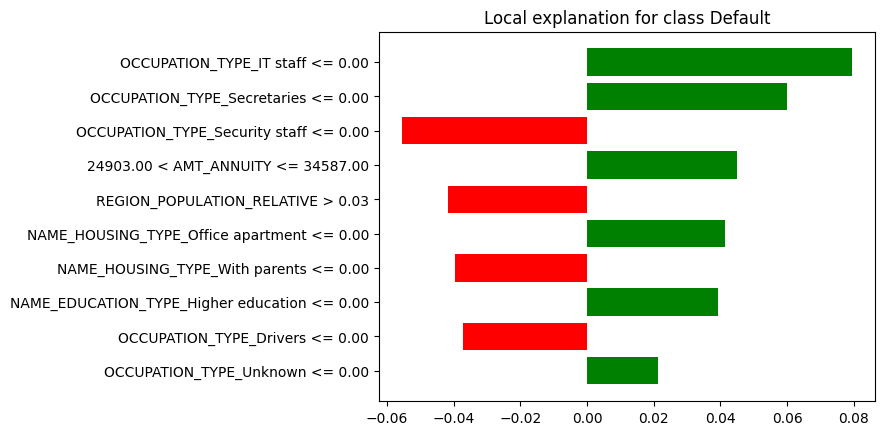

In [27]:
# Initialize LIME Tabular Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Training data
    feature_names=X_train.columns,  # Column names
    class_names=['Non-default', 'Default'],  # Replace with your class names
    mode='classification'
)

# Choose a sample from the test set to explain
sample_index = 5  # Change this to explore other samples
sample = X_test.iloc[sample_index]

# Wrap the sample as a DataFrame to ensure correct input format
sample_df = pd.DataFrame([sample.values], columns=X_test.columns)

# Generate an explanation using a lambda to ensure predict_proba works correctly
exp = explainer.explain_instance(
    data_row=sample_df.values[0],  # Pass the sample row correctly
    predict_fn=lambda x: best_model.predict_proba(pd.DataFrame(x, columns=X_test.columns))
)

# Display the LIME explanation in the notebook
exp.show_in_notebook(show_table=True)

# Optionally, plot the explanation
fig = exp.as_pyplot_figure()
plt.show()


In [28]:
import pandas as pd

# Define a function to preprocess and predict new input data
def preprocess_and_predict(new_data, model, X_train):
    # Ensure new_data is a DataFrame and matches the format used during training
    new_data_df = pd.DataFrame([new_data], columns=X_train.columns)

    # Preprocess the input data (e.g., scaling and encoding using the fitted pipeline)
    processed_data = model.named_steps['preprocessor'].transform(new_data_df)

    # Make a prediction using the trained model
    prediction = model.named_steps['classifier'].predict(processed_data)
    prediction_proba = model.named_steps['classifier'].predict_proba(processed_data)

    # Output the prediction and probability
    print("Predicted Class:", "Default" if prediction[0] == 1 else "Non-default")
    print("Prediction Probability:", prediction_proba[0])

# Define a hypothetical high-risk profile for prediction
new_data_default_risk = {
    'AMT_INCOME_TOTAL': 50000,            # Low income
    'AMT_CREDIT': 600000,                 # High credit amount
    'AMT_ANNUITY': 25000,                 # High annuity relative to income
    'AMT_GOODS_PRICE': 550000,            # High goods price relative to income
    'DAYS_BIRTH': -16000,                 # Older age, indicating potential longer debt tenure
    'DAYS_EMPLOYED': 0,                   # Recently unemployed (or a high positive value if treated as unemployment duration)
    'REGION_POPULATION_RELATIVE': 0.04,   # Lives in a densely populated area, often associated with higher default rates
    'EXT_SOURCE_1': 0.1,                  # Low external source score (proxy for credit score)
    'EXT_SOURCE_2': 0.15,                 # Low external source score
    'EXT_SOURCE_3': 0.2,                  # Low external source score
    'CNT_FAM_MEMBERS': 4,                 # Larger family size, potentially higher financial burden
    'FLAG_MOBIL': 1,                      # Owns a mobile phone (neutral)
    'FLAG_EMAIL': 1,                      # Has email (neutral)
    'FLAG_WORK_PHONE': 0,                 # No work phone, could indicate lack of stable employment
    # Encoded categorical features based on riskier profile indicators
    'NAME_INCOME_TYPE_Working': 0,
    'NAME_INCOME_TYPE_Unemployed': 1,     # Unemployed status increases risk
    'NAME_EDUCATION_TYPE_Higher_education': 0,
    'NAME_EDUCATION_TYPE_Secondary_education': 1,
    'NAME_FAMILY_STATUS_Married': 0,
    'NAME_FAMILY_STATUS_Single': 1,       # Single, might indicate less financial support
    'NAME_HOUSING_TYPE_House_apartment': 1,
    'NAME_HOUSING_TYPE_With_parents': 0,
    'OCCUPATION_TYPE_Laborers': 1,        # Occupation type associated with higher risk
    'OCCUPATION_TYPE_Sales_staff': 0,
    # Add more encoded columns here if needed
}

# Call the prediction function with this high-risk profile
preprocess_and_predict(new_data_default_risk, best_model, X_train)



Predicted Class: Non-default
Prediction Probability: [0.71857476 0.28142524]


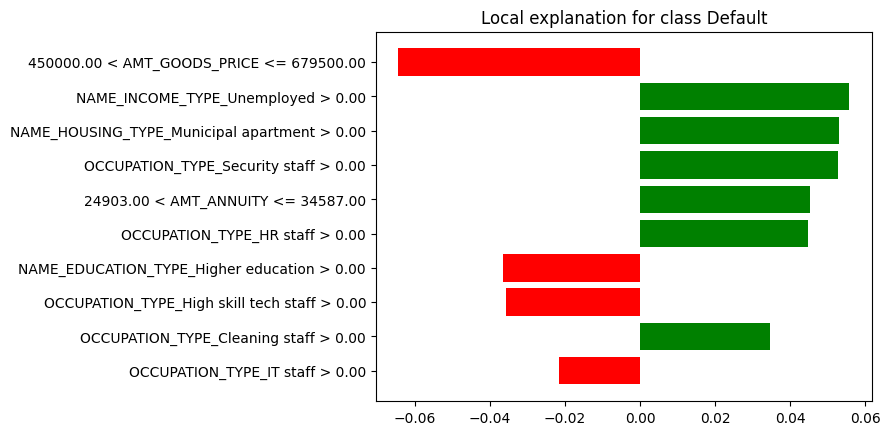

In [29]:
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Convert the new input data into a DataFrame
new_data_default_risk_df = pd.DataFrame([new_data_default_risk], columns=X_train.columns)

# Generate a LIME explanation for this input
explainer = LimeTabularExplainer(
    training_data=X_train.values,         # Training data for reference
    feature_names=X_train.columns,        # Feature names from training data
    class_names=['Non-default', 'Default'],  # Class labels as defined by your model
    mode='classification'
)

# Explain the prediction
exp = explainer.explain_instance(
    data_row=new_data_default_risk_df.values[0],  # The high-risk profile data
    predict_fn=lambda x: best_model.predict_proba(pd.DataFrame(x, columns=X_train.columns))  # Model's prediction function
)

# Display the LIME explanation in the notebook
exp.show_in_notebook(show_table=True)

# Plot the explanation for a visual overview of influential features
fig = exp.as_pyplot_figure()
plt.show()


In [30]:
pip install joblib onnxmltools onnxruntime


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import onnxmltools
import xgboost as xgb
from skl2onnx.common.data_types import FloatTensorType  # Add this import

# Ensure the explainer is initialized with the processed training data
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train)

# Refit the XGBClassifier on the processed training data
xgb_classifier = xgb.XGBClassifier(**grid_search.best_params_)  # Initialize with best params if available
xgb_classifier.fit(X_train_processed, y_train)

# Convert the XGBoost model to ONNX
onnx_model = onnxmltools.convert_xgboost(
    xgb_classifier,
    initial_types=[('float_input', FloatTensorType([None, X_train_processed.shape[1]]))]
)

# Save the model
onnx_model_path = "xgb_classifier.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model saved as {onnx_model_path}")


/opt/app-root/lib64/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators", "classifier__scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved as xgb_classifier.onnx


In [32]:
import onnxruntime as ort
import numpy as np
import pandas as pd

# Define a sample input for testing (replace with any new data)
new_data_default_risk = {
    'AMT_INCOME_TOTAL': 50000,
    'AMT_CREDIT': 600000,
    'AMT_ANNUITY': 25000,
    'AMT_GOODS_PRICE': 550000,
    'DAYS_BIRTH': -16000,
    'DAYS_EMPLOYED': 0,
    'REGION_POPULATION_RELATIVE': 0.04,
    'EXT_SOURCE_1': 0.1,
    'EXT_SOURCE_2': 0.15,
    'EXT_SOURCE_3': 0.2,
    'CNT_FAM_MEMBERS': 4,
    'FLAG_MOBIL': 1,
    'FLAG_EMAIL': 1,
    'FLAG_WORK_PHONE': 0,
    'NAME_INCOME_TYPE_Working': 0,
    'NAME_INCOME_TYPE_Unemployed': 1,
    'NAME_EDUCATION_TYPE_Higher_education': 0,
    'NAME_EDUCATION_TYPE_Secondary_education': 1,
    'NAME_FAMILY_STATUS_Married': 0,
    'NAME_FAMILY_STATUS_Single': 1,
    'NAME_HOUSING_TYPE_House_apartment': 1,
    'NAME_HOUSING_TYPE_With_parents': 0,
    'OCCUPATION_TYPE_Laborers': 1,
    'OCCUPATION_TYPE_Sales_staff': 0
}

# Convert the dictionary to a DataFrame
test_data = pd.DataFrame([new_data_default_risk])

# Load the training columns (assuming 'df_encoded' was used in training)
# Replace `df_encoded` with your actual DataFrame used for model training if different
training_columns = df_encoded.columns  # Ensure this matches the columns from your training data

# Save training_columns as a list
training_columns = df_encoded.columns.tolist()
joblib.dump(training_columns, "training_columns.pkl")

# Ensure test_data has the same columns as training data
test_data = test_data.reindex(columns=training_columns, fill_value=0)

# Preprocess the test data
test_data_processed = best_model.named_steps['preprocessor'].transform(test_data)

# Load the ONNX model
session = ort.InferenceSession(onnx_model_path)

# Prepare input data in the required format for ONNX (numpy array)
input_name = session.get_inputs()[0].name
test_data_array = test_data_processed.astype(np.float32)

# Run the model and get the output
prediction = session.run(None, {input_name: test_data_array})[0]

# Display the prediction result
predicted_class = "Default" if prediction[0] == 1 else "Non-default"
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probability: {prediction}")


Predicted Class: Non-default
Prediction Probability: [0]


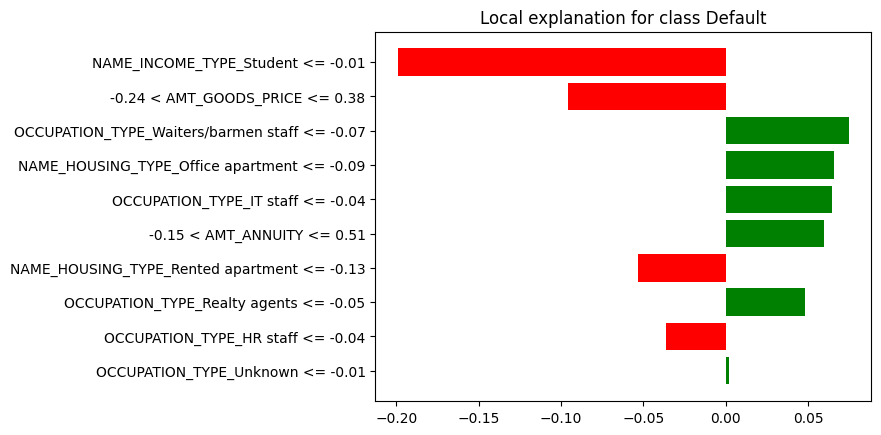

In [33]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Ensure the explainer is initialized with the processed training data
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train)

# Initialize the LIME Tabular Explainer with processed training data
explainer = LimeTabularExplainer(
    training_data=X_train_processed,
    feature_names=X_train.columns,  # Feature names from the original data
    class_names=['Non-default', 'Default'],  # Class labels
    mode='classification'
)

# Select the test instance to explain (e.g., the new_data_default_risk sample)
sample = test_data_processed[0].reshape(1, -1)  # Ensure it's a 2D array for LIME

# Generate the explanation, ensuring `predict_fn` returns probabilities
exp = explainer.explain_instance(
    data_row=sample[0],  # Pass the flattened array
    predict_fn=lambda x: session.run(None, {input_name: x.astype(np.float32)})[1]  # Get probabilities
)

# Display the LIME explanation in a notebook format
exp.show_in_notebook(show_table=True)

# Optionally, plot the explanation for a visual overview
fig = exp.as_pyplot_figure()
plt.show()


In [34]:
import pandas as pd
import numpy as np

# Define a sample input with a low-risk profile (more likely to be "Non-default")
new_data_non_default_risk = {
    'AMT_INCOME_TOTAL': 150000,            # Higher income
    'AMT_CREDIT': 200000,                  # Lower credit amount
    'AMT_ANNUITY': 10000,                  # Lower annuity relative to income
    'AMT_GOODS_PRICE': 180000,             # Lower goods price relative to income
    'DAYS_BIRTH': -12000,                  # Middle-aged
    'DAYS_EMPLOYED': -3000,                # Long-term employment
    'REGION_POPULATION_RELATIVE': 0.02,    # Less densely populated area
    'EXT_SOURCE_1': 0.8,                   # High external source score
    'EXT_SOURCE_2': 0.85,                  # High external source score
    'EXT_SOURCE_3': 0.9,                   # High external source score
    'CNT_FAM_MEMBERS': 2,                  # Smaller family size
    'FLAG_MOBIL': 1,                       # Owns a mobile phone
    'FLAG_EMAIL': 1,                       # Has an email
    'FLAG_WORK_PHONE': 1,                  # Has a work phone
    # Encoded categorical features based on a lower-risk profile
    'NAME_INCOME_TYPE_Working': 1,
    'NAME_INCOME_TYPE_Unemployed': 0,
    'NAME_EDUCATION_TYPE_Higher_education': 1,
    'NAME_EDUCATION_TYPE_Secondary_education': 0,
    'NAME_FAMILY_STATUS_Married': 1,
    'NAME_FAMILY_STATUS_Single': 0,
    'NAME_HOUSING_TYPE_House_apartment': 1,
    'NAME_HOUSING_TYPE_With_parents': 0,
    'OCCUPATION_TYPE_Laborers': 0,
    'OCCUPATION_TYPE_Sales_staff': 1,
}

# Convert the dictionary to a DataFrame
test_data_non_default = pd.DataFrame([new_data_non_default_risk])

# Ensure test_data_non_default has the same columns as the training data
test_data_non_default = test_data_non_default.reindex(columns=training_columns, fill_value=0)

# Preprocess the test data
test_data_processed = best_model.named_steps['preprocessor'].transform(test_data_non_default)

# Run the model with ONNX runtime
prediction = session.run(None, {input_name: test_data_processed.astype(np.float32)})[0]

# Display the prediction result
predicted_class = "Default" if prediction[0] == 1 else "Non-default"
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probability: {prediction}")


Predicted Class: Non-default
Prediction Probability: [0]


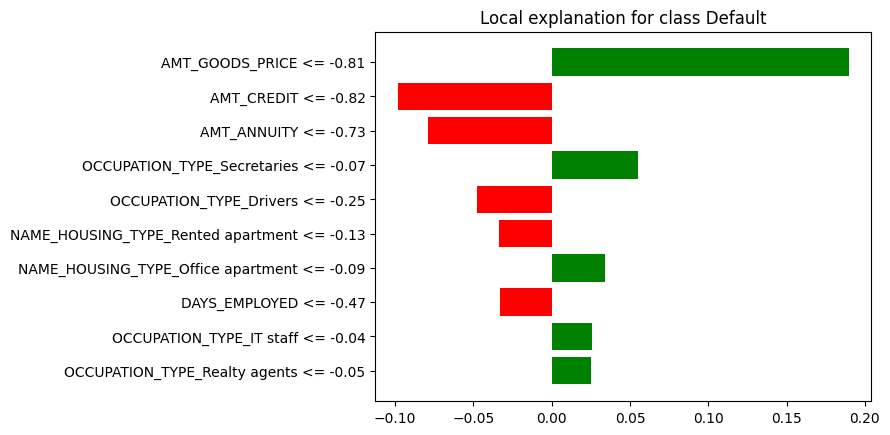

In [35]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Initialize the LIME Tabular Explainer with the preprocessed training data
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train)

explainer = LimeTabularExplainer(
    training_data=X_train_processed,
    feature_names=X_train.columns,  # Use the original feature names
    class_names=['Non-default', 'Default'],  # Class labels
    mode='classification'
)

# Generate the explanation for the processed "Non-default" test instance
exp = explainer.explain_instance(
    data_row=test_data_processed[0],  # Pass the processed row
    predict_fn=lambda x: session.run(None, {input_name: x.astype(np.float32)})[1]  # Use probabilities
)

# Display the LIME explanation in a notebook format
exp.show_in_notebook(show_table=True)

# Plot the explanation for a visual overview of influential features
fig = exp.as_pyplot_figure()
plt.show()


In [38]:
import os

# Define the directory path where you want to save the model
model_directory = "models/1"
model_filename = "xgb_classifier.onnx"

# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Define the full path for the model file
model_path = os.path.join(model_directory, model_filename)

# Save the ONNX model
with open(model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model saved at: {model_path}")


Model saved at: models/1/xgb_classifier.onnx


In [39]:

# Save the best model to disk
joblib.dump(best_model, "best_model.joblib")
print("Best model saved as 'best_model.joblib'")

Best model saved as 'best_model.joblib'


In [40]:
# Save X_train to CSV
X_train.reset_index(drop=True, inplace=True)  # Reset index to ensure a clean DataFrame
X_train.to_csv("X_train.csv", index=False, encoding='UTF-8')  # Save without the index column
print("X_train saved as 'X_train.csv'")

X_train saved as 'X_train.csv'
